# Example

Device: cuda
[ 0.23219955  0.60371882  0.96362812  1.32353741  1.69505669  2.06657596
  2.42648526  2.79800454  3.16952381  3.52943311  3.92417234  4.2492517
  4.62077098  4.99229025  5.35219955  5.72371882  6.08362812  6.44353741
  6.81505669  7.18657596  7.54648526  7.91800454  8.27791383  8.64943311
  9.02095238  9.38086168  9.74077098 10.10068027 10.47219955 10.84371882
 11.20362812 11.57514739 11.93505669 12.30657596 12.66648526 13.03800454
 13.39791383 13.76943311 14.1293424  14.50086168 14.87238095 15.23229025
 15.60380952 15.96371882 16.32362812 16.69514739 17.05505669 17.42657596
 17.79809524 18.16961451 18.52952381 18.88943311 19.2493424  19.62086168
 19.98077098 20.35229025 20.72380952 21.0953288  21.4552381  21.81514739
 22.18666667 22.55818594 22.91809524 23.27800454 23.64952381 24.02104308
 24.3693424  24.74086168 25.11238095 25.48390023 25.84380952 26.20371882
 26.5752381  26.94675737 27.30666667 27.67818594 28.04970522 28.39800454
 28.78113379 29.14104308 29.51256236 29

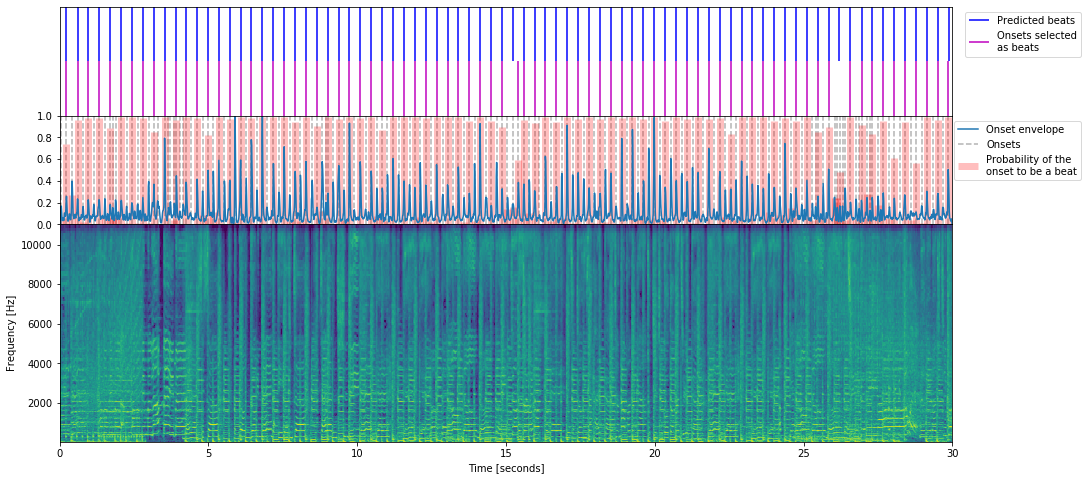

In [13]:
import beatfinder
import torch
from IPython.display import Audio

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

#Load a pretrained model
model = beatfinder.model.load('./data/pretrained-models/model3rd.pt', device)

#Load an audio sample
example = beatfinder.data.load(audio_file='D:/Music/HeartShaker.wav',
                                   offset=10, duration=30)

#Use the model to predict which onsets are beats (by default this information is stored in `./tmp/`).
example.predict(model, device)

#Display result
example.showdata(beatfinder=model, device=device)

#Listen to the predicted beats
beats_predicted = example.predicted_beats()[0]
print(beats_predicted)
clicks = beatfinder.display.clicks(example.get_wav(), beats_predicted)
Audio(clicks, rate=beatfinder.constants.sr)

In [9]:
import beatfinder
import torch
from IPython.display import Audio

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

#Load a pretrained model
model = beatfinder.model.load('./data/pretrained-models/model_12Test2.pt', device)

example = beatfinder.data.load(audio_file='D:/Music/Vexento.wav',
                                   beats_file='D:/beatVexento.beats',
                                   offset=0, duration=30)

example.predict(model, device)
example.showdata(beatfinder=model, device=device)

#Listen to ground truth beats
clicks = beatfinder.display.clicks(example.get_wav(), example.get_beats())
Audio(clicks, rate=beatfinder.constants.sr)

Device: cuda


RuntimeError: Error(s) in loading state_dict for BeatDetect:
	Unexpected key(s) in state_dict: "lstm.weight_ih_l0", "lstm.weight_hh_l0", "lstm.bias_ih_l0", "lstm.bias_hh_l0", "lstm.weight_ih_l0_reverse", "lstm.weight_hh_l0_reverse", "lstm.bias_ih_l0_reverse", "lstm.bias_hh_l0_reverse", "lstm.weight_ih_l1", "lstm.weight_hh_l1", "lstm.bias_ih_l1", "lstm.bias_hh_l1", "lstm.weight_ih_l1_reverse", "lstm.weight_hh_l1_reverse", "lstm.bias_ih_l1_reverse", "lstm.bias_hh_l1_reverse", "lstm.weight_ih_l2", "lstm.weight_hh_l2", "lstm.bias_ih_l2", "lstm.bias_hh_l2", "lstm.weight_ih_l2_reverse", "lstm.weight_hh_l2_reverse", "lstm.bias_ih_l2_reverse", "lstm.bias_hh_l2_reverse", "hid_to_beat.weight", "hid_to_beat.bias". 

The most common metric is the F-score, where two beats are considered the same if they are less than 0.07 seconds apart from each other.

In [9]:
predicted_beats, bpm = example.predicted_beats()
ground_truth_beats = example.get_beats()
tp, fn, fp = beatfinder.utils.tp_fn_fp(ground_truth_beats, predicted_beats)
F = beatfinder.utils.F(tp, fn, fp)
print(f"F-score: {F:.3f}")

F-score: 1.000
